Estudio Variables vs TIempo para historico Nov - Mar

In [1]:
# Leo historico completo
import pandas as pd
input = pd.read_excel(r"Input_time.xlsx")

In [2]:
columns_to_drop = [
    #'Fecha y hora',
    'Presion Linea 0ºC',
    'Potencia Frick 1 \nkw', 
    'Potencia Frick 2\nkw',   
    'Potencia Frick 3 \nkw',
    'Potencia Frick 4 \nkw'
]

df = input.drop(columns=columns_to_drop)

df = df.rename(columns = {'Qevap (kW)': 'Qevap ciclo ref. (kW)','Qcond (kW)': 'Qcond ciclo ref. (kW)', 'COP':'COP ciclo ref.'
                         , 'heating power (kw)': 'Qcond bomba (kW)','Cooling power (kw)': 'Qevap bomba (kW)', 
                         'COP h': 'COP bomba',
                         'T entrada lado frio (ºC)': 'T ent. evaporador bomba (ºC)',
                         'T salida lado frio (ºC)': 'T sal. evaporador bomba (ºC)',
                        'T entrada lado caliente (ºC)': 'T ent. condensador bomba (ºC)',
                        'T salida lado caliente (ºC)': 'T sal. condensador bomba (ºC)',
                          'Potencia consumida (ºC)': 'Potencia bomba (kW)',
                         'Presion Linea -10ºC': 'Presión de Baja (barg)', 'Presion de Alta': 'Presión de Alta (barg)', 'PotComp elec': 'Potencia Comp. ciclo ref. (kW)'})

column_order = [
    'Fecha y hora',
    'Presión de Baja (barg)',
    'Presión de Alta (barg)',
    'Potencia Comp. ciclo ref. (kW)',
    'Qevap ciclo ref. (kW)',
    'Qcond ciclo ref. (kW)',
    'COP ciclo ref.',
    'Tbh (ºC)',
    'T ent. evaporador bomba (ºC)',
    'T sal. evaporador bomba (ºC)',
    'T ent. condensador bomba (ºC)',
    'T sal. condensador bomba (ºC)',
    'Potencia bomba (kW)',
    'Qcond bomba (kW)',
    'Qevap bomba (kW)',
    'COP bomba'
]

df = df[column_order]

In [3]:
# FUNCION PARA PLOTEO
import matplotlib.pyplot as plt


df['Fecha y hora'] = pd.to_datetime(df['Fecha y hora'])

# plot 
def plot_variables(df, start_date, end_date, col1, col2):
    
    mask = (df['Fecha y hora'] >= start_date) & (df['Fecha y hora'] <= end_date)
    filtered_df = df.loc[mask]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(15,7))

    color = 'tab:red'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel(col1, color=color)
    ax1.plot(filtered_df['Fecha y hora'], filtered_df[col1], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  

    color = 'tab:blue'
    ax2.set_ylabel(col2, color=color)
    ax2.plot(filtered_df['Fecha y hora'], filtered_df[col2], color=color)
    ax2.tick_params(axis='y', labelcolor=color)


    plt.title(f'{col1} and {col2} vs. Tiempo')
    fig.tight_layout()  
    plt.show()



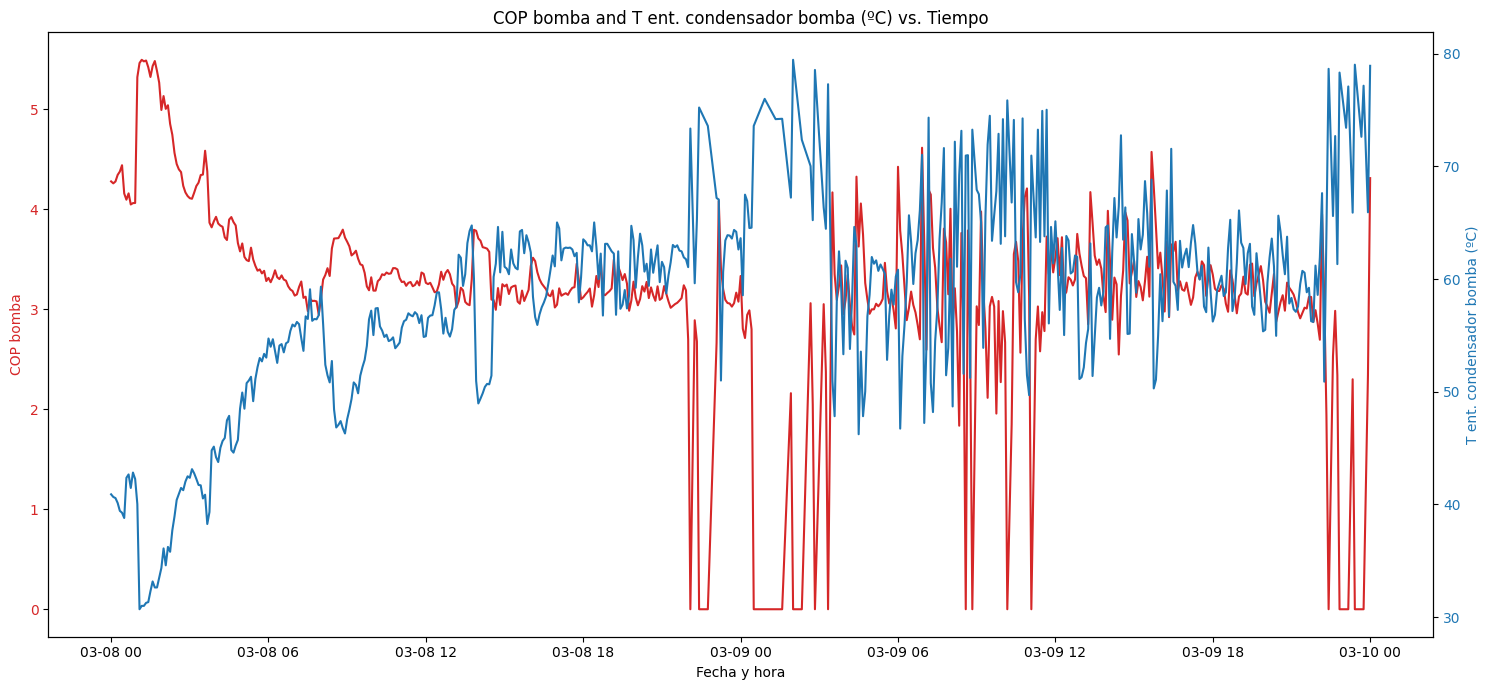

In [12]:
# COP h y T ent caliente

start_date = pd.to_datetime('2024-03-08')
end_date = pd.to_datetime('2024-03-10')  
col1 = 'COP bomba'  
col2 = 'T ent. condensador bomba (ºC)'  

plot_variables(df, start_date, end_date, col1, col2)

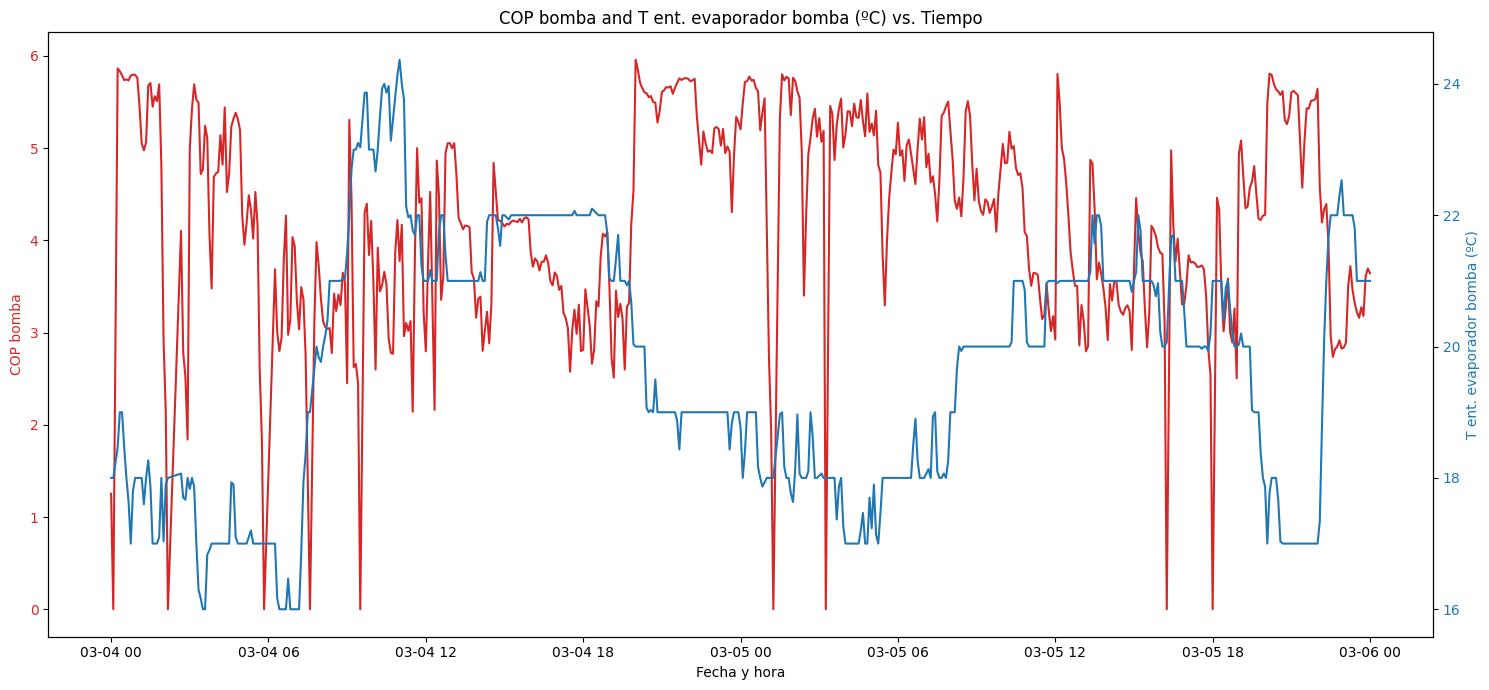

In [14]:
# COP h y T ent frio

start_date = pd.to_datetime('2024-03-04')  
end_date = pd.to_datetime('2024-03-06')  
col1 = 'COP bomba'  
col2 = 'T ent. evaporador bomba (ºC)'  

plot_variables(df, start_date, end_date, col1, col2)

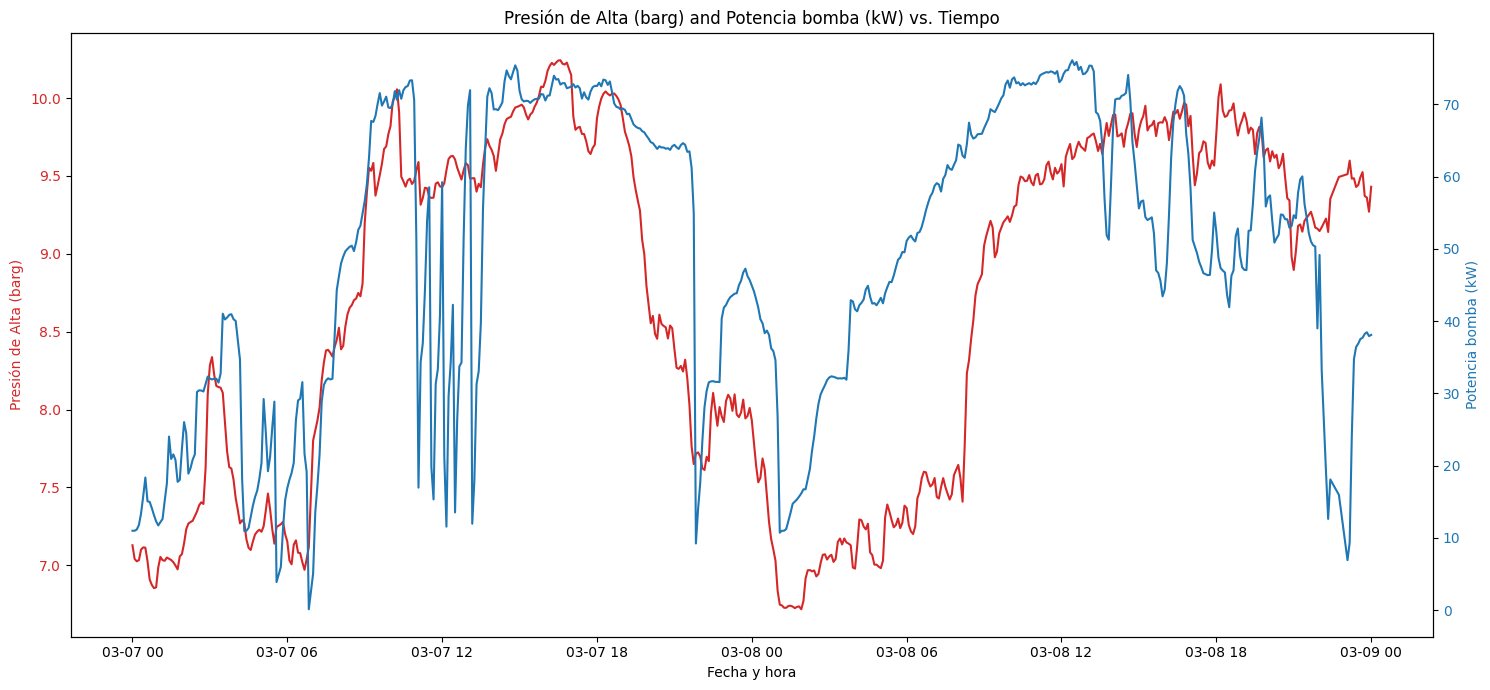

In [15]:
# Pcond y pot bomba

start_date = pd.to_datetime('2024-03-07')  
end_date = pd.to_datetime('2024-03-09')  
col1 = 'Presión de Alta (barg)'  
col2 = 'Potencia bomba (kW)'  

plot_variables(df, start_date, end_date, col1, col2)

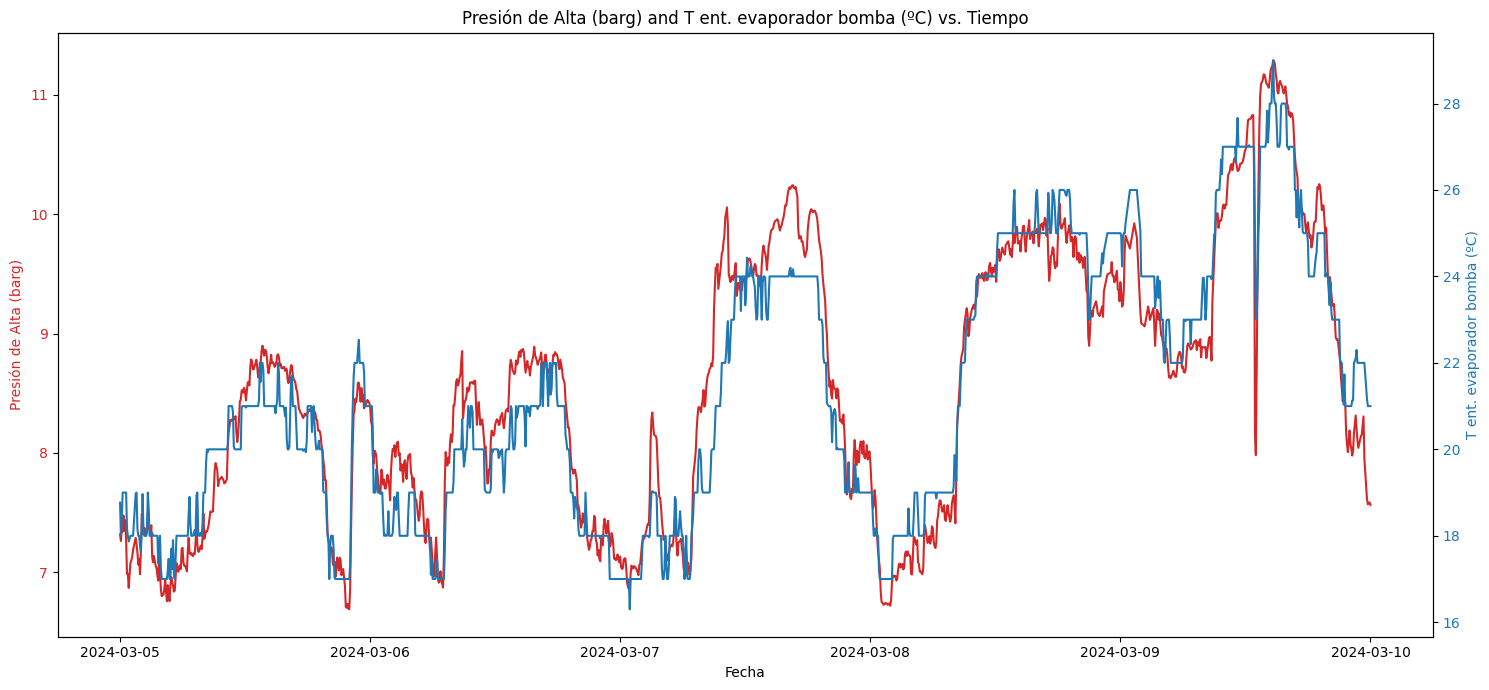

In [18]:
# Pcond y T ent f

start_date = pd.to_datetime('2024-03-05')  
end_date = pd.to_datetime('2024-03-10')  
col1 = 'Presión de Alta (barg)'  
col2 = 'T ent. evaporador bomba (ºC)'  

plot_variables(df, start_date, end_date, col1, col2)

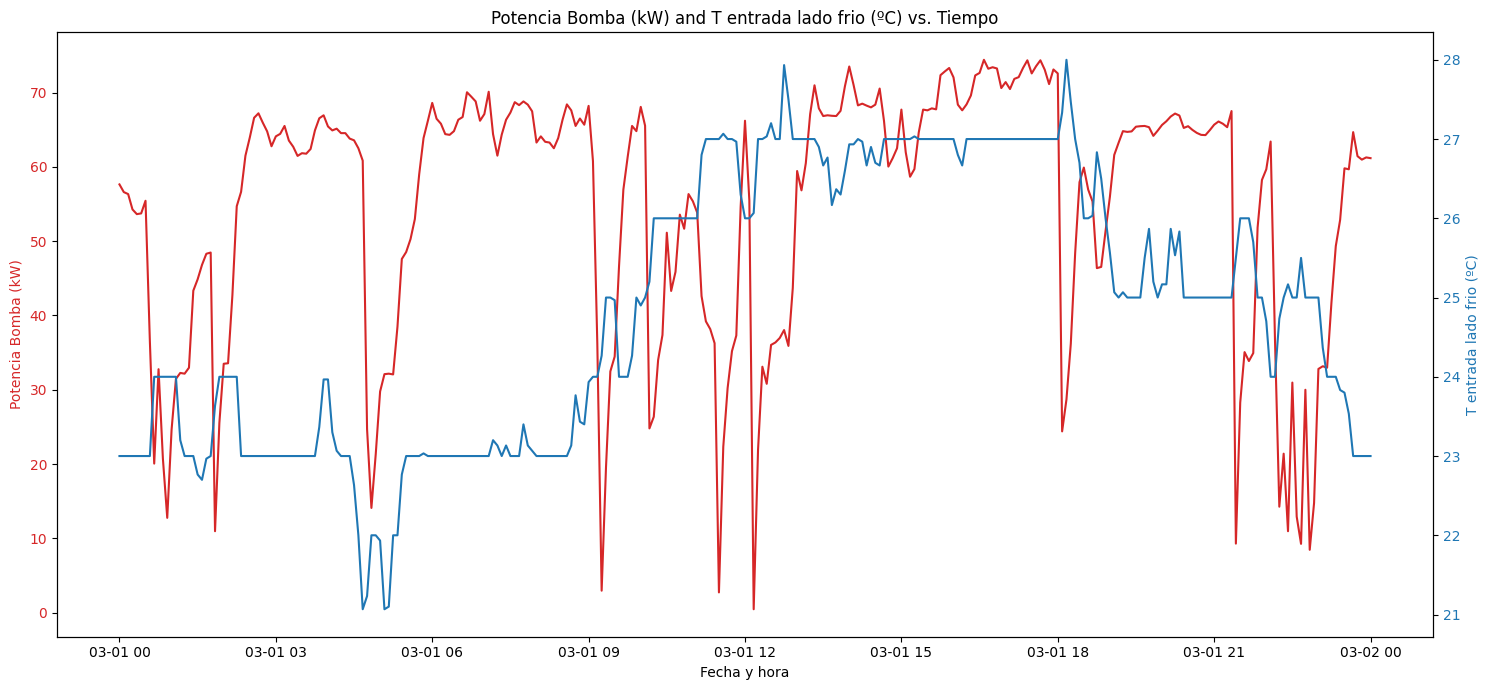

In [22]:
# T ent f y Pot bba

start_date = pd.to_datetime('2024-03-01')  
end_date = pd.to_datetime('2024-03-02')  
col1 = 'Potencia Bomba (kW)'  
col2 = 'T entrada lado frio (ºC)'  

plot_variables(df, start_date, end_date, col1, col2)

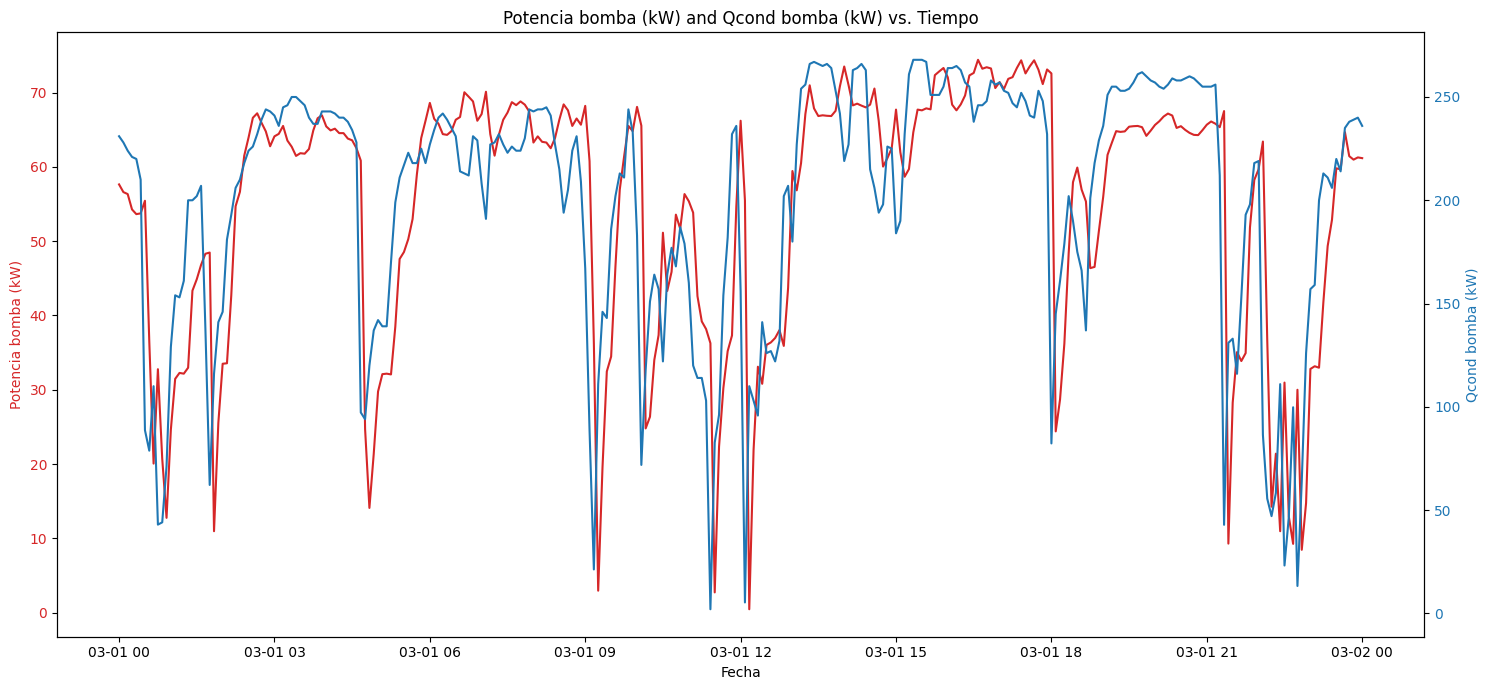

In [9]:
# Pot bba y Q cond bba

start_date = pd.to_datetime('2024-03-01')  
end_date = pd.to_datetime('2024-03-02')  
col1 = 'Potencia bomba (kW)'  
col2 = 'Qcond bomba (kW)'  

plot_variables(df, start_date, end_date, col1, col2)

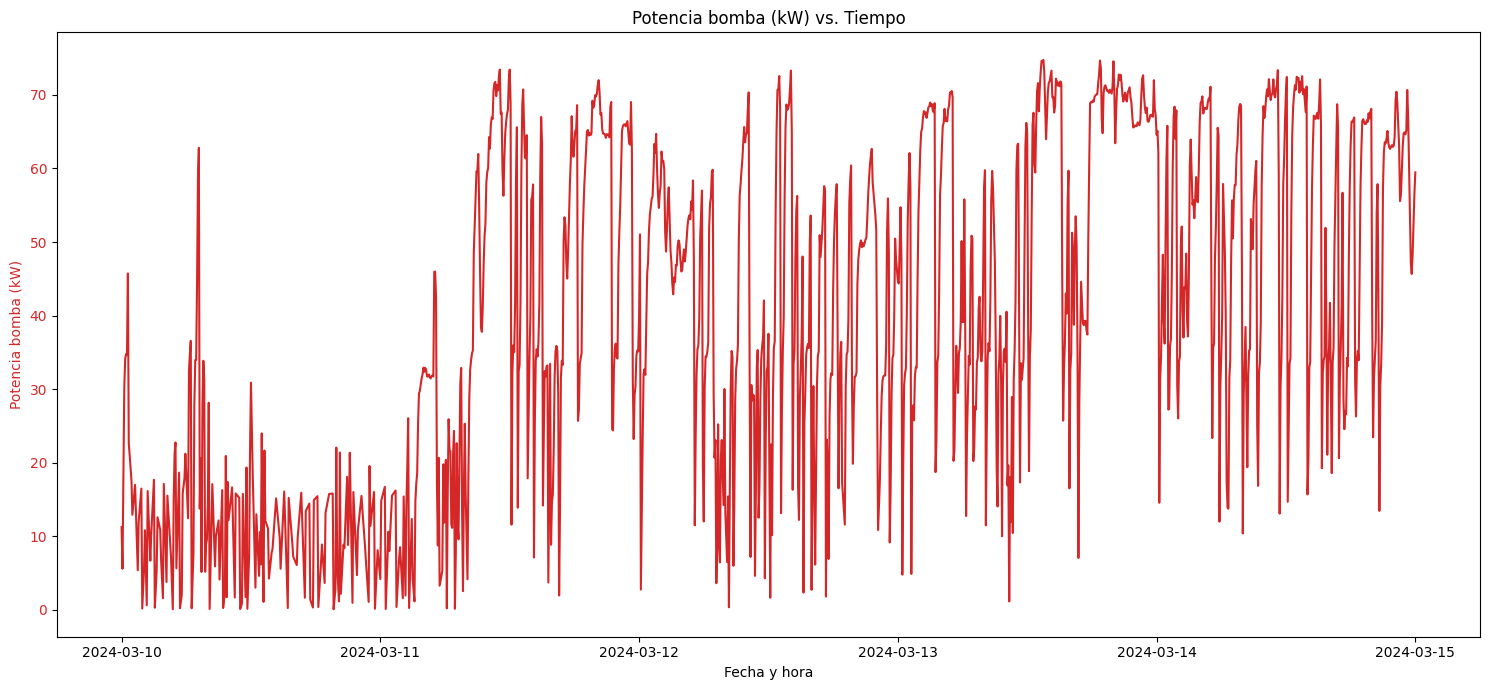

In [20]:
# Potencia de la Bomba
import matplotlib.pyplot as plt

def plot_variables_1(df, start_date, end_date, col1):
 
    mask = (df['Fecha y hora'] >= start_date) & (df['Fecha y hora'] <= end_date)
    filtered_df = df.loc[mask]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(15,7))

    color = 'tab:red'
    ax1.set_xlabel('Fecha y hora')
    ax1.set_ylabel(col1, color=color)
    ax1.plot(filtered_df['Fecha y hora'], filtered_df[col1], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    plt.title(f'{col1} vs. Tiempo')
    fig.tight_layout() 
    plt.show()


start_date = pd.to_datetime('2024-03-10')  
end_date = pd.to_datetime('2024-03-15')  
col1 = 'Potencia bomba (kW)'  


plot_variables_1(df, start_date, end_date, col1)

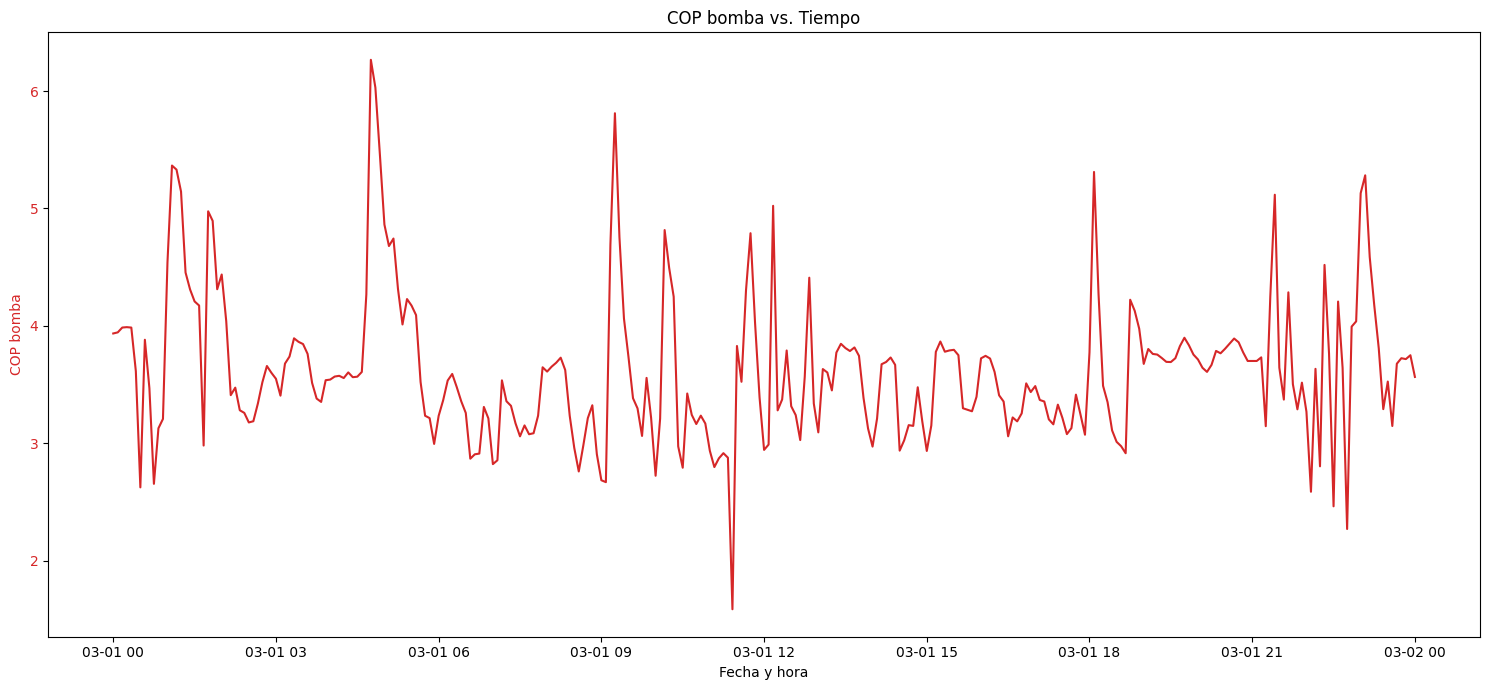

In [11]:
# COP de la bba
import matplotlib.pyplot as plt

def plot_variables_1(df, start_date, end_date, col1):
    # Filter 
    mask = (df['Fecha y hora'] >= start_date) & (df['Fecha y hora'] <= end_date)
    filtered_df = df.loc[mask]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(15,7))

    color = 'tab:red'
    ax1.set_xlabel('Fecha y hora')
    ax1.set_ylabel(col1, color=color)
    ax1.plot(filtered_df['Fecha y hora'], filtered_df[col1], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    plt.title(f'{col1} vs. Tiempo')
    fig.tight_layout()  
    plt.show()


start_date = pd.to_datetime('2024-03-01') 
end_date = pd.to_datetime('2024-03-02')  
col1 = 'COP bomba'  


plot_variables_1(df, start_date, end_date, col1)

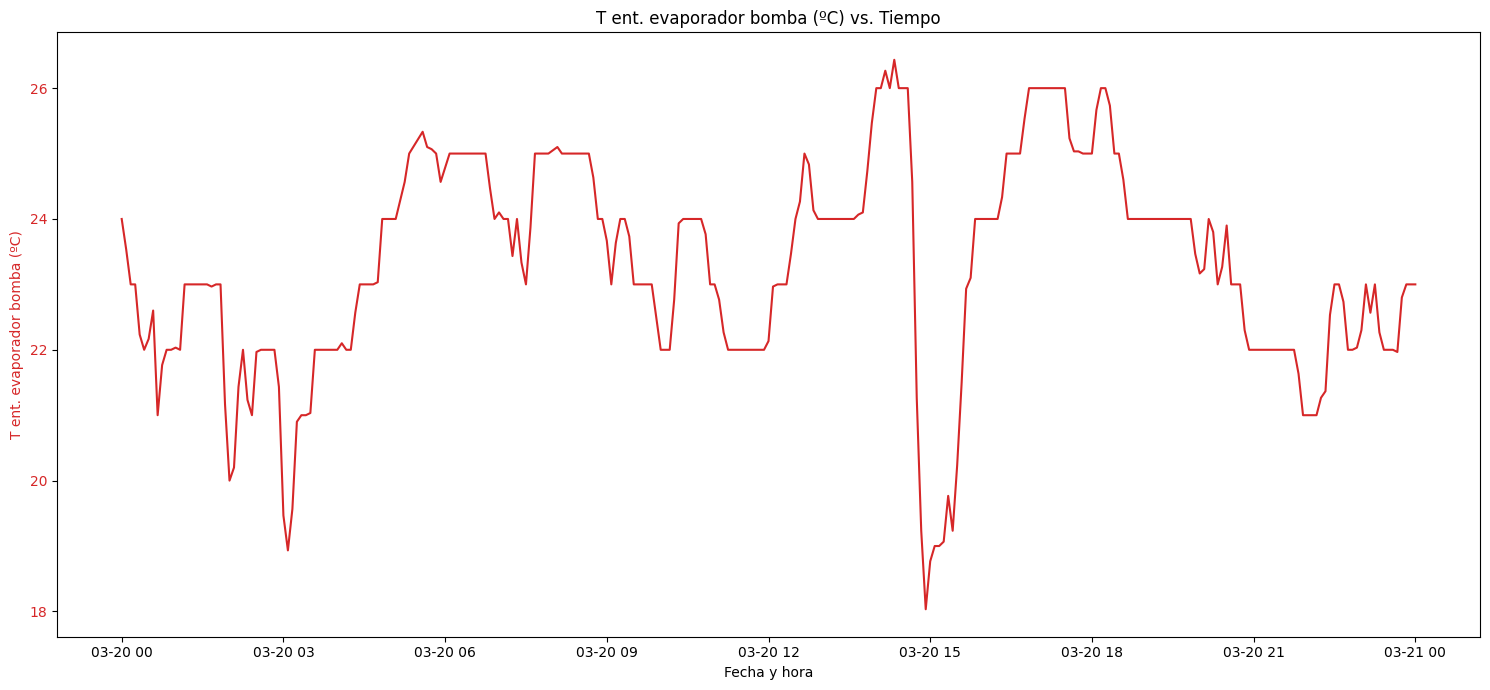

In [11]:
# T ent evaporador
import matplotlib.pyplot as plt

def plot_variables_1(df, start_date, end_date, col1):
    
    mask = (df['Fecha y hora'] >= start_date) & (df['Fecha y hora'] <= end_date)
    filtered_df = df.loc[mask]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(15,7))

    color = 'tab:red'
    ax1.set_xlabel('Fecha y hora')
    ax1.set_ylabel(col1, color=color)
    ax1.plot(filtered_df['Fecha y hora'], filtered_df[col1], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    plt.title(f'{col1} vs. Tiempo')
    fig.tight_layout()  
    plt.show()


start_date = pd.to_datetime('2024-03-20') 
end_date = pd.to_datetime('2024-03-21')  
col1 = 'T ent. evaporador bomba (ºC)'  


plot_variables_1(df, start_date, end_date, col1)

In [15]:
import seaborn as sns

def plot_scatter_with_regression(df, x_column, y_column):
    sns.lmplot(x=x_column, y=y_column, data=df, aspect=2, height=7, line_kws={'color': 'red'})
    plt.title(f'Relación entre {x_column} y {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    #plt.ylim([0, 100])



In [ ]:
y_column = 'Potencia bomba (kW)'  
x_column = 'Presión de Alta (barg)'  

plot_scatter_with_regression(df, x_column, y_column)

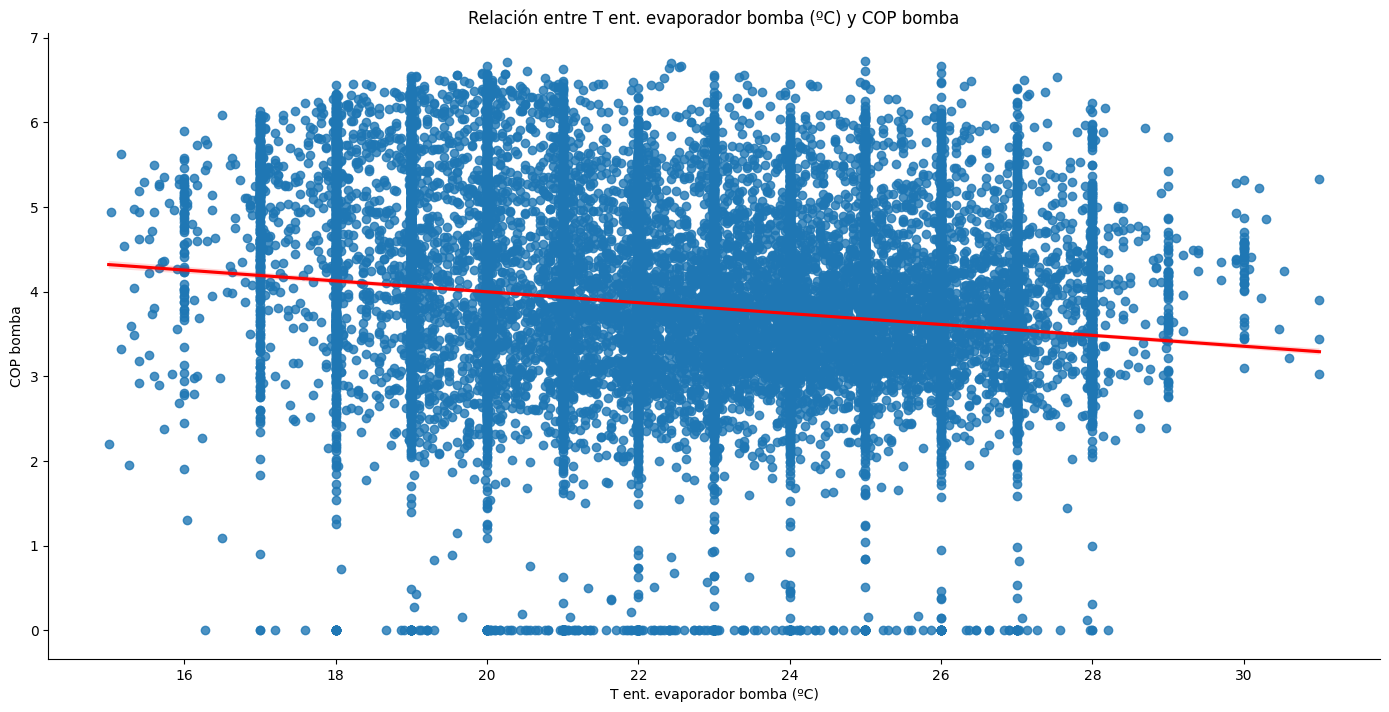

In [22]:

y_column = 'COP bomba' 
x_column = 'T ent. evaporador bomba (ºC)'  

df_test = df[(df['T ent. condensador bomba (ºC)' ]>=50) |(df['T ent. condensador bomba (ºC)' ]<=60)]
plot_scatter_with_regression(df_test, x_column, y_column)

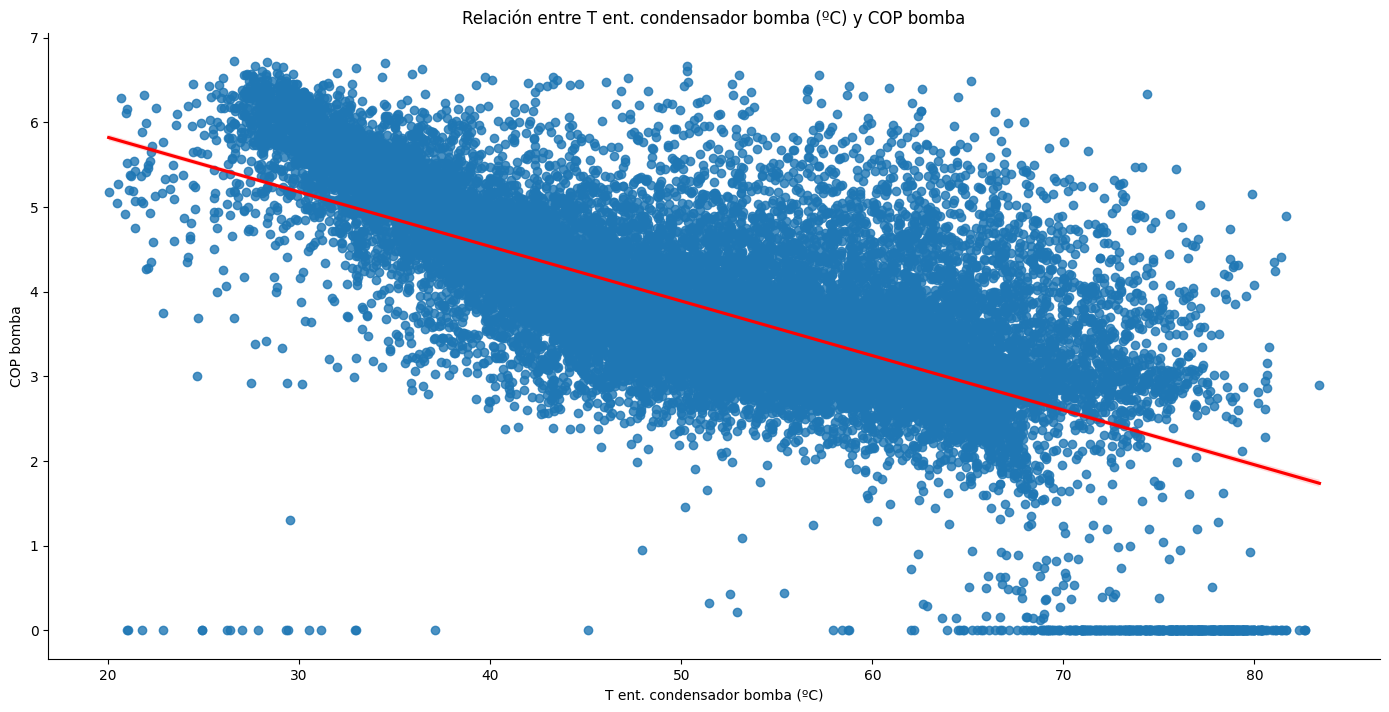

In [17]:
y_column = 'COP bomba'  
x_column = 'T ent. condensador bomba (ºC)'  

plot_scatter_with_regression(df, x_column, y_column)

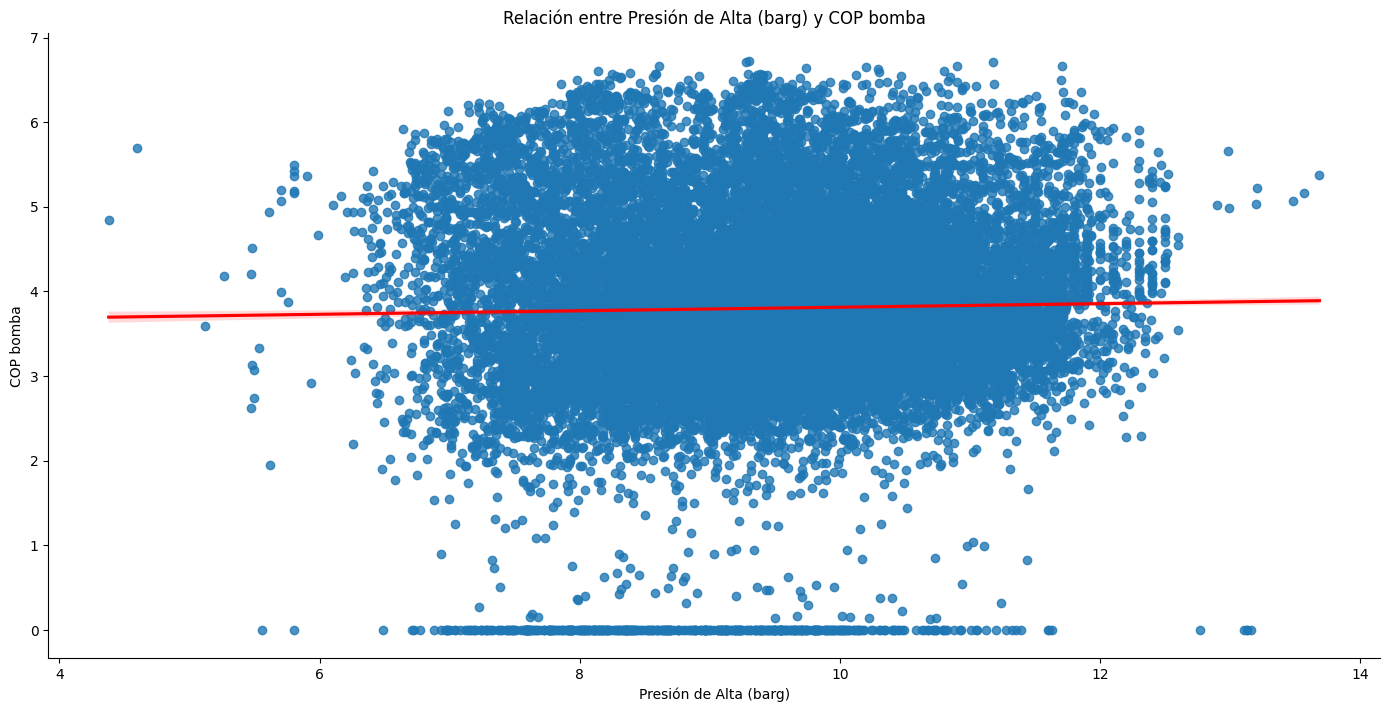

In [23]:
y_column = 'COP bomba'  
x_column = 'Presión de Alta (barg)'  


df_test = df[(df['T ent. condensador bomba (ºC)' ]>=50) |(df['T ent. condensador bomba (ºC)' ]<=60)]
plot_scatter_with_regression(df_test, x_column, y_column)

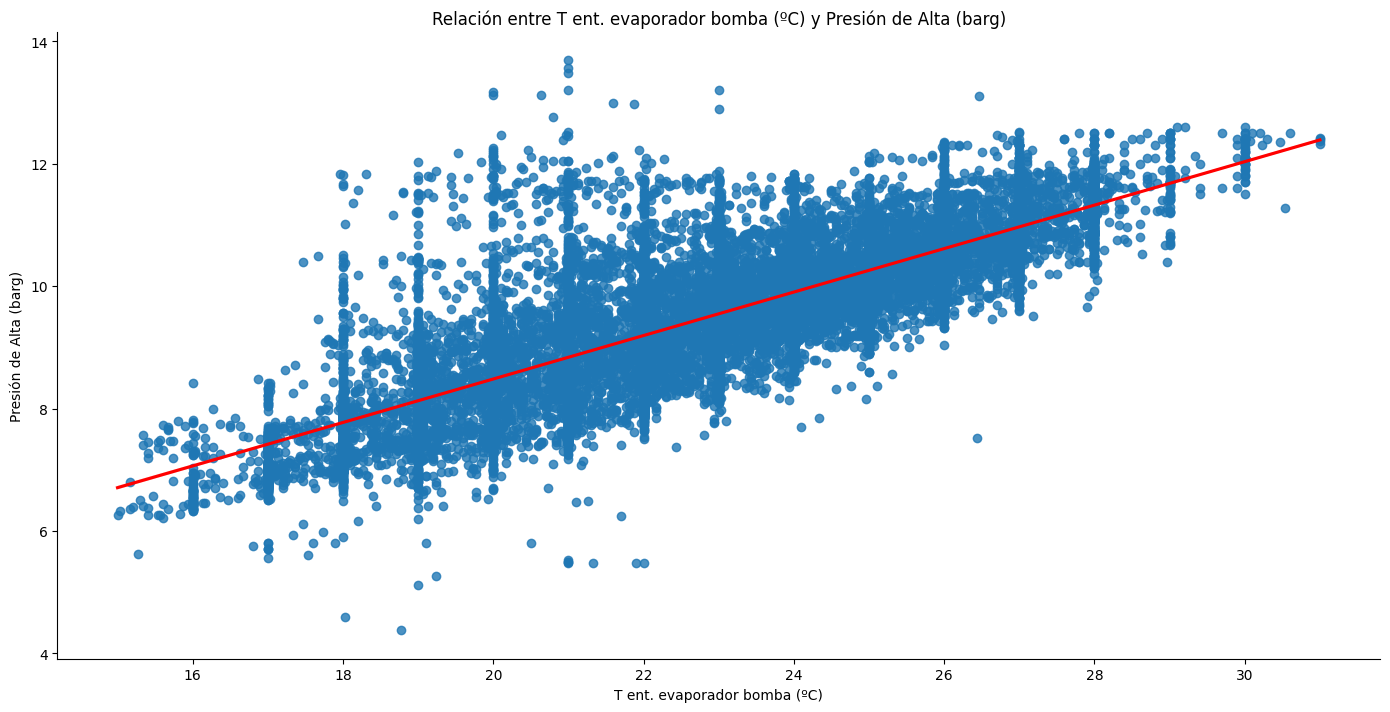

In [20]:
# P alta y T ent f
x_column = 'T ent. evaporador bomba (ºC)'  
y_column = 'Presión de Alta (barg)' 


plot_scatter_with_regression(df, x_column, y_column)